In [1]:
%matplotlib notebook

import numpy as np
from functools import partial
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#https://data8.science.blog/2020/07/10/seaborn-style/

%load_ext autoreload
%autoreload 2

### Week 01

In [2]:
def log_map_func(r, x):
    return r*x*(1-x)

def apply_iter_map_1d (map_fx, x0, n):
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(0, n):
        x[i+1] = map_fx(x[i])
    return x   


In [3]:
def map1(x0, r, n):
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(0, n):
        x[i+1] = r*x[i]+3
    return x

In [44]:
np.sum(np.abs(xs1-xs2))/N

0.2440673377395355

<IPython.core.display.Javascript object>


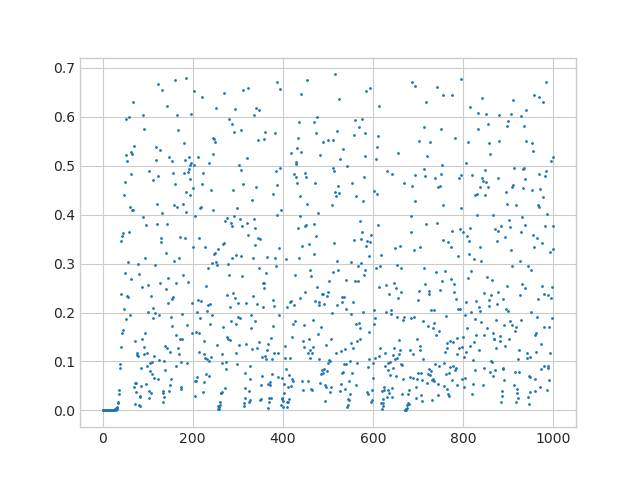

In [31]:
fig=plt.figure()
ax = plt.axes()
ax.scatter(np.arange(0,N+1), np.abs(xs1-xs2), s=1, label=str(r))


<IPython.core.display.Javascript object>


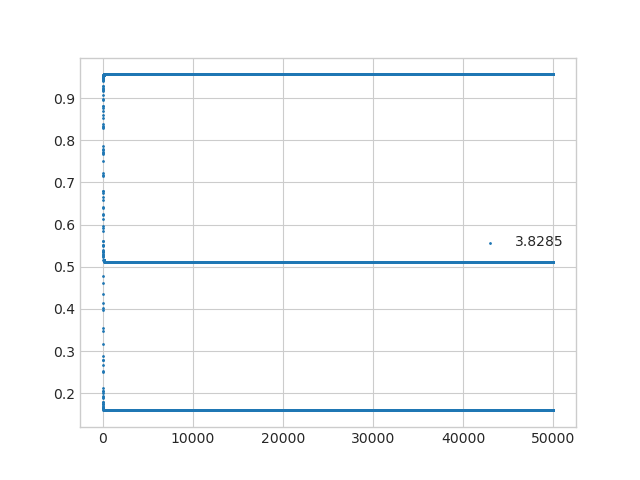

In [147]:
N=50000
r=3.828
fig=plt.figure()
ax = plt.axes()
x0= 0.2
#for x0 in np.linspace(0.1, 0.8, ):
#for x0 in np.linspace(0.2, 0.89, 1 ):
    #for r in np.linspace(3.551, 3.551, 1 ):
for r in [3.8285]:
    xs = apply_iter_map_1d (partial(log_map_func, r), x0, N)
    #xs = log_map(x0=x0, r=r, n=N)
    ax.scatter(np.arange(0,N+1), xs, s=1, label=str(r))
ax.legend(loc='best')


### Week 2

In [5]:
def plot_coweb(map_fx, x0, n):
    # Coweb plots 
    # At the end, the lines that we need to plog are:
    # (x0,0) -> (x0,x1)
    # (x0,x1) -> (x1,x1)
    # (x1,x1) -> (x1,x2)
    # (x1,x2) -> (x2,x2)
    # ....
    fig=plt.figure()
    ax = plt.axes()
    xs = np.linspace(0,1,100)
    ys = map_fx(xs)
    ax.plot(xs, ys, '-o', markersize=1)
    ax.plot(xs, xs, '-o', markersize=1)
    xs = apply_iter_map_1d (map_fx, x0, N)
    X = np.repeat(xs, 2, axis=None)
    Y = np.roll(X,-1)
    Y[0] = 0
    ax.plot(X[:-1],Y[:-1])


<IPython.core.display.Javascript object>


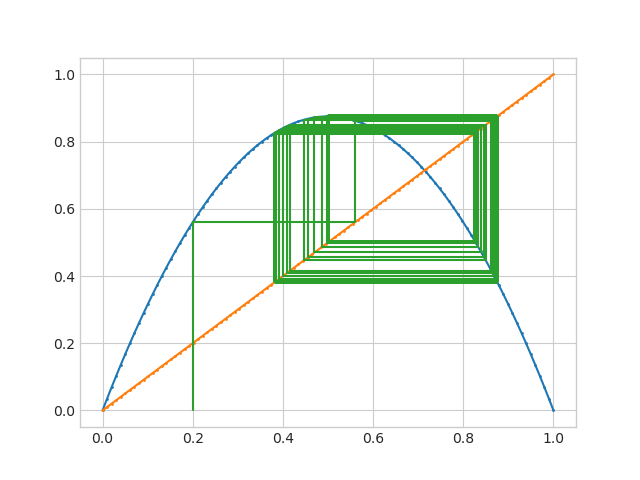

In [6]:
N = 500
x0 = 0.2
r = 3.5
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
plot_coweb(map_fx, x0=x0, n=N)


In [7]:
def compose2(f, g):
    return lambda x: f(g(x))

<IPython.core.display.Javascript object>


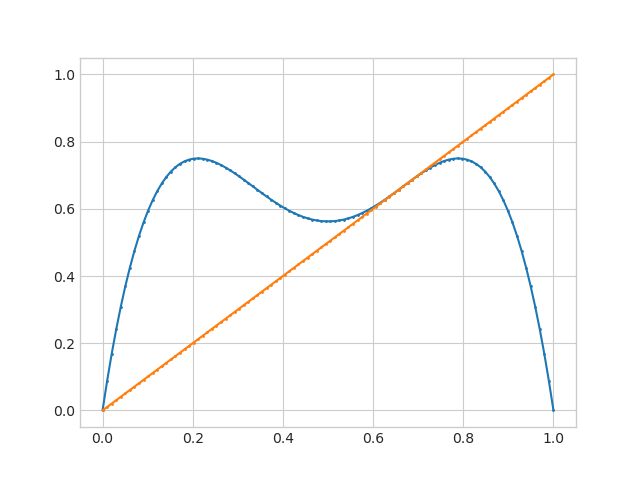

In [19]:
r=3
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
N = 200
x0 = 0.5
fig=plt.figure()
ax = plt.axes()
xs = np.linspace(0,1,100)
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
map_f2x = compose2(map_fx, map_fx) 
ys = map_f2x (xs)
ax.plot(xs, ys, '-o', markersize=1)
ax.plot(xs, xs, '-o', markersize=1)


<IPython.core.display.Javascript object>


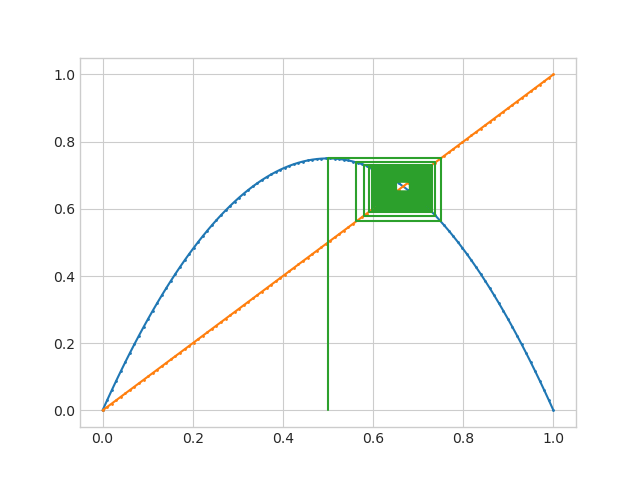

In [18]:
r=3
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
N = 200
x0 = 0.5
plot_coweb(map_fx, x0=x0, n=N)

<IPython.core.display.Javascript object>


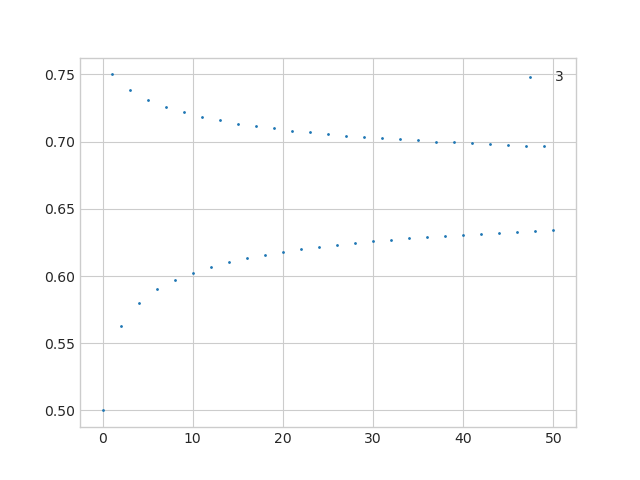

In [17]:
fig=plt.figure()
ax = plt.axes()
r=3
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
N = 50
x0 = 0.5
xs = apply_iter_map_1d (map_fx, x0, N)
    #xs = log_map(x0=x0, r=r, n=N)
ax.scatter(np.arange(0,N+1), xs, s=1, label=str(r))
ax.legend(loc='best')

In [23]:
# Solving the fixed points of the logistic map for r=3, xn+1 = xn
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(3*x*(1-x)-x, x)

[0, 2/3]

<IPython.core.display.Javascript object>


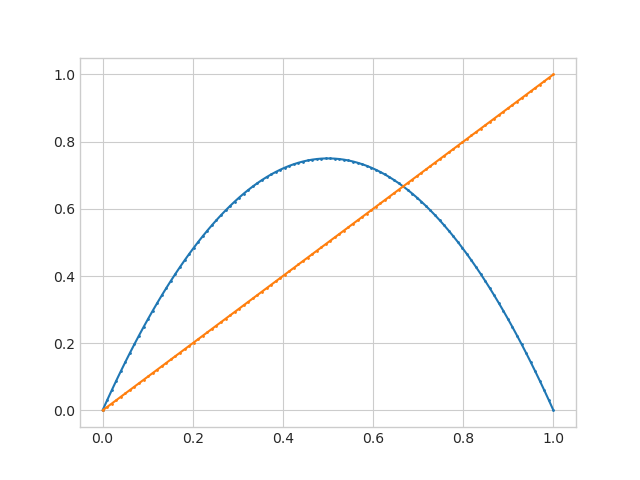

In [24]:
# In the next figure, we can see the two fixed points, (0,0) and (2/3, 2/3) (previously calculated)
r=3
map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
fig=plt.figure()
ax = plt.axes()
xs = np.linspace(0,1,100)
ys = map_fx(xs)
ax.plot(xs, ys, '-o', markersize=1)
ax.plot(xs, xs, '-o', markersize=1)

In [74]:
def plot_bifurcation(map_func, r_range, x0s, n_discard, n, x_limits=None):
    fig=plt.figure()
    ax = plt.axes()
    n_tokeep = n - n_discard
    X = np.zeros(len(r_range)*len(x0s) *n_tokeep)
    Y = np.zeros(X.shape)
    i = 0
    for r in r_range:
        map_fx = partial(map_func, r) # the log_map is left just a a function of x
        #for x0 in np.linspace(0.01, 0.99, n_xos):
        for x0 in x0s:
            xs = apply_iter_map_1d (map_fx, x0, n)
            Y[i:i+n_tokeep] = xs[-n_tokeep:]
            X[i:i+n_tokeep] = r
            i +=n_tokeep
            #ax.scatter(np.arange(0,n+1), xs, s=5, label=str(x0))
            #ax.plot(np.arange(0,n+1), xs, '-o', markersize=1, label=str(x0))
    ax.plot(X,Y,".",markersize=.05, color="green" )
    #x_limits = (1,1.2)
    #y_limits = (-0.1,0.1)    
    if x_limits is not None:
        ax.set_xlim(x_limits)
    else :
        ax.set_xlim((r_range[0],r_range[-1]))
    
    #ax.legend(loc='best')    

<IPython.core.display.Javascript object>


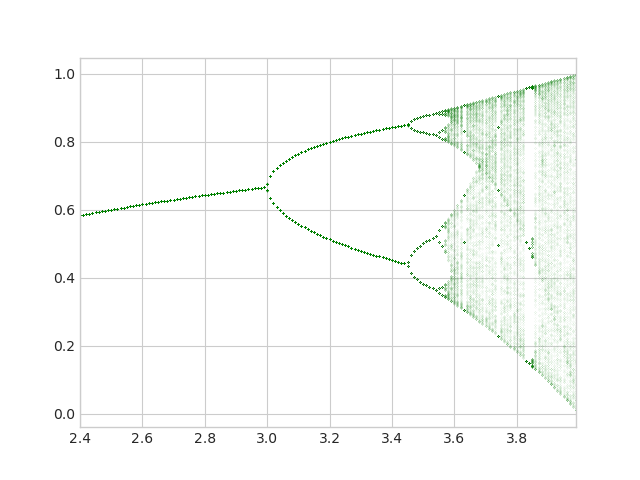

In [76]:
rs = np.arange(2.4, 4, 0.01)
x0s = [0.2]
N_DISCARD = 500
N = 1000
plot_bifurcation(log_map_func, rs, x0s, N_DISCARD, N )

<IPython.core.display.Javascript object>


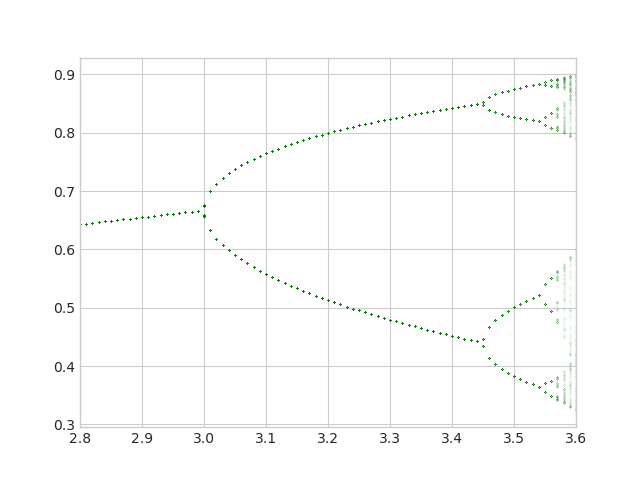

In [77]:
rs = np.arange(2.8, 3.6, 0.01)
x0s = [0.2]
N_DISCARD = 500
N = 1000
plot_bifurcation(log_map_func, rs, x0s, N_DISCARD, N )

<IPython.core.display.Javascript object>


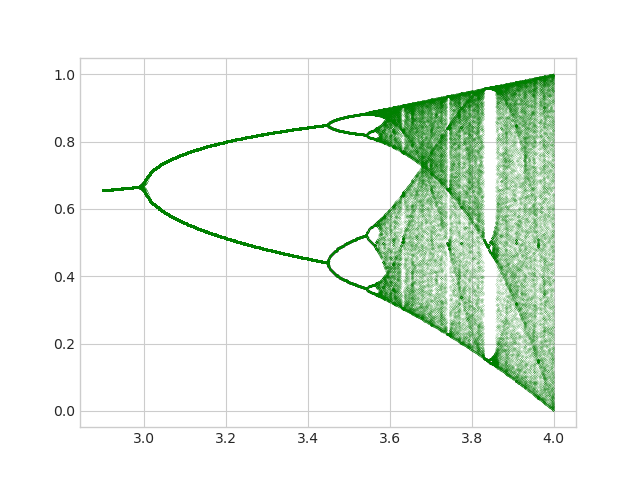

In [152]:
N = 300
fig=plt.figure()
ax = plt.axes()
R_MIN = 2.899
R_MAX = 3.999
N_Rs = 500
N_X0s = 50
N_SAMPLES = 10
X = np.zeros(N_Rs*N_X0s*N_SAMPLES)
Y = np.zeros(N_Rs*N_X0s*N_SAMPLES)
i = 0
for r in np.linspace(R_MIN,R_MAX, N_Rs):
    map_fx = partial(log_map_func, r) # the log_map is left just a a function of x
    for x0 in np.linspace(0.01, 0.99, N_X0s):
        xs = apply_iter_map_1d (map_fx, x0, N)
        Y[i:i+N_SAMPLES] = xs[-N_SAMPLES:]
        X[i:i+N_SAMPLES] = r
        i +=N_SAMPLES
        #ax.scatter(np.arange(0,n+1), xs, s=5, label=str(x0))
        #ax.plot(np.arange(0,n+1), xs, '-o', markersize=1, label=str(x0))
ax.plot(X,Y,".",markersize=.1, color="green" )
#ax.legend(loc='best')

<IPython.core.display.Javascript object>


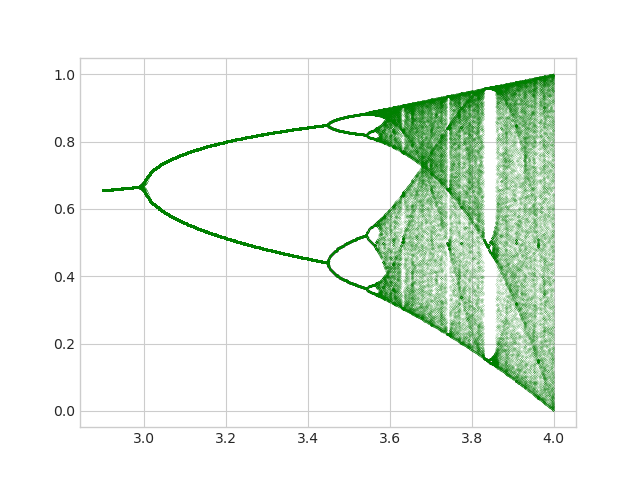

In [153]:
N = 300
fig=plt.figure()
ax = plt.axes()
R_MIN = 2.899
R_MAX = 3.999
N_Rs = 500
for r in np.linspace(R_MIN,R_MAX, N_Rs):
    map_fx = partial(log_map_func, r) # the log_map is defined just a a function of x
    for x0 in np.linspace(0.01, 0.99,50):
        xs = apply_iter_map_1d (map_fx, x0, N)
        ax.plot(np.full(10, r),xs[-10:],".", markersize=.1, color="green" )
        


In [76]:
np.full(10, 7)


array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [104]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 10)
for i in range(1, 6):
    plt.plot(x, i * x + i, label='$y = {i}x + {i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

In [43]:
np.linspace(0.1, 3.9,10)

array([0.1       , 0.52222222, 0.94444444, 1.36666667, 1.78888889,
       2.21111111, 2.63333333, 3.05555556, 3.47777778, 3.9       ])